<function matplotlib.pyplot.show(*args, **kw)>

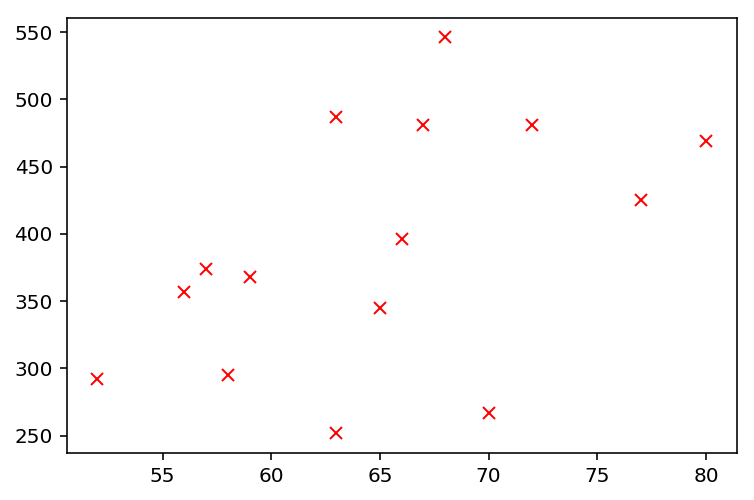

In [2]:
# Regresión polinomial
import matplotlib.pyplot as plt

ef createMatrix(m,n,v):
    C = []
    for i in range(m):
        C.append([v]*n)
    return C

def getDimensions(A):
    return (len(A),len(A[0]))

def copyMatrix(B):
    m,n = getDimensions(B)
    A = createMatrix(m,n,0)
    for i in range(m):
        for j in range(n):
            A[i][j] = B[i][j]
    return A

def sumaMatrix(A,B):
    Am,An = getDimensions(A)
    Bm,Bn = getDimensions(B)
    if Am != Bm or An != Bn:
        print("Error las dimensiones deben ser iguales")
        return []
    C = createMatrix(Am,An,0)
    for i in range(Am):
        for j in range(An):
            C[i][j] = A[i][j] + B[i][j]
    return C

def restaMatrix(A,B):
    Am,An = getDimensions(A)
    Bm,Bn = getDimensions(B)
    if Am != Bm or An != Bn:
        print("Error las dimensiones deben ser iguales")
        return []
    C = createMatrix(Am,An,0)
    for i in range(Am):
        for j in range(An):
            C[i][j] = A[i][j] - B[i][j]
    return C

def multMatrix(A,B):
    Am,An = getDimensions(A)
    Bm,Bn = getDimensions(B)
    if An != Bm:
        print("Error las dimensiones deben ser conformable")
        return []
    C = createMatrix(Am,Bn,0)
    for i in range(Am):
        for j in range(Bn):
            for k in range(An):
                    C[i][j] += A[i][k] * B[k][j]
    return C
    
def getAdyacente(A,r,c):
    Am,An = getDimensions(A)
    C = createMatrix(Am-1,An-1,0)
    for i in range(Am):
        if i == r:
            continue
        for j in range(An):
            if j == c:
                continue
            ci = 0
            cj = 0
            if(i < r):
                ci = i
            else:
                ci = i - 1
            if(j < c):
                cj = j
            else:
                cj = j - 1
            C[ci][cj] = A[i][j]
    return C

def detMatrix(A):
    m,n = getDimensions(A)
    if m != n:
        print("La matriz no es cuadrada")
        return []
    if m == 1:
        return A[0][0]
    if m == 2:
        return A[0][0]*A[1][1] - A[1][0]*A[0][1]
    det = 0
    for j in range(m):
        det += ((-1)**j)*A[0][j]*detMatrix(getAdyacente(A,0,j))
    return det


def getMatrizTranspuesta(A):
    m,n = getDimensions(A)
    C = createMatrix(n,m,0)
    for i in range(m):
        for j in range(n):
            C[j][i] = A[i][j]
    return C

def getMatrizAdjunta(A):
    m,n = getDimensions(A)
    if m != n:
        print("La matriz no es cuadrada")
        return []
    C = createMatrix(m,n,0)
    for i in range(m):
        for j in range(n):
            C[i][j] = ((-1)**(i+j))*detMatrix(getAdyacente(A,i,j))
    return C

def getMatrizInversa(A):
    m,n = getDimensions(A)
    if m != n:
        print("La matriz no es cuadrada")
        return []
    detA = detMatrix(A)
    if detA == 0:
        print("La matriz no tiene inversa")
        return []
    At = getMatrizTranspuesta(A)
    adjA = getMatrizAdjunta(At)
    invDetA = 1/detA
    C = createMatrix(m,n,0)
    for i in range(m):
        for j in range(n):
            C[i][j] = invDetA * adjA[i][j]
    return C

x = [67,52, 56, 66, 65, 80, 77, 68, 70, 59, 58, 63, 72, 57, 63]
y = [481, 292, 357, 396, 345, 469, 425, 546, 267, 368, 295, 487, 481, 374, 252]

plt.plot(x, y, 'rx')
plt.show()

def regresion(n,x,y):
    dim = n + 1
    A createMatriz(dim, dim, 0)
    for i in range(dim):
        for j in range(dim):
            A[i][j] = sum(xi**(i+j)